In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, date

In [60]:
customer= pd.read_csv(r"F:\AnalyticslabFIles\Projects\python\Case Study 1 - Retail Case Study\Customer.csv")
prod_cat_info= pd.read_csv(r"F:\AnalyticslabFIles\Projects\python\Case Study 1 - Retail Case Study\prod_cat_info.csv")
transaction= pd.read_csv(r"F:\AnalyticslabFIles\Projects\python\Case Study 1 - Retail Case Study\Transactions.csv")

In [61]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [62]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [63]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [64]:
cust_prod_trans= pd.merge(left= prod_cat_info, right= transaction, how= 'inner', on= 'prod_cat_code' )

In [65]:
cust_prod_trans.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type
0,1,Clothing,4,Mens,80712190438,270351,28-02-2014,1,-5,-772,405.30,-4265.30,e-Shop
1,1,Clothing,4,Mens,79792372943,275108,22-02-2014,3,-3,-908,286.02,-3010.02,MBR


In [66]:
cust_prod_trans= pd.merge(left= cust_prod_trans, right= customer, how= 'inner', left_on='cust_id', right_on= 'customer_Id'  )

In [67]:
cust_prod_trans.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1,Clothing,4,Mens,80712190438,270351,28-02-2014,1,-5,-772,405.3,-4265.3,e-Shop,270351,26-09-1981,M,5.0
1,1,Clothing,4,Mens,80712190438,270351,20-02-2014,1,5,772,405.3,4265.3,e-Shop,270351,26-09-1981,M,5.0


#### 2. Prepare a summary report for the merged data set.
 ##### a. Get the column names and their corresponding data types

In [80]:
cust_prod_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   prod_cat_code      99293 non-null  object 
 1   prod_cat           99293 non-null  object 
 2   prod_sub_cat_code  99293 non-null  object 
 3   prod_subcat        99293 non-null  object 
 4   transaction_id     99293 non-null  object 
 5   cust_id            99293 non-null  object 
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  object 
 8   Qty                99293 non-null  int64  
 9   Rate               99293 non-null  int64  
 10  Tax                99293 non-null  float64
 11  total_amt          99293 non-null  float64
 12  Store_type         99293 non-null  object 
 13  customer_Id        99293 non-null  object 
 14  DOB                99293 non-null  object 
 15  Gender             99253 non-null  object 
 16  city_code          992

##### b. Top/Bottom 10 observations

In [69]:
cust_prod_trans.head(10)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1,Clothing,4,Mens,80712190438,270351,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,1,Clothing,4,Mens,80712190438,270351,20-02-2014,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
2,1,Clothing,1,Women,80712190438,270351,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
3,1,Clothing,1,Women,80712190438,270351,20-02-2014,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
4,1,Clothing,3,Kids,80712190438,270351,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
5,1,Clothing,3,Kids,80712190438,270351,20-02-2014,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
6,2,Footwear,1,Mens,36957441426,270351,16-09-2013,3,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
7,2,Footwear,3,Women,36957441426,270351,16-09-2013,3,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
8,2,Footwear,4,Kids,36957441426,270351,16-09-2013,3,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
9,3,Electronics,4,Mobiles,12236277258,270351,18-03-2013,8,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0


In [70]:
cust_prod_trans.tail(10)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
99283,6,Home and kitchen,11,Bath,96622725554,267539,21-03-2011,11,5,1360,714.00,7514.00,e-Shop,267539,25-01-1989,F,6.0
99284,6,Home and kitchen,12,Tools,96622725554,267539,21-03-2011,11,5,1360,714.00,7514.00,e-Shop,267539,25-01-1989,F,6.0
99285,6,Home and kitchen,2,Furnishing,65823235153,272650,16-02-2011,11,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0
99286,6,Home and kitchen,10,Kitchen,65823235153,272650,16-02-2011,11,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0
99287,6,Home and kitchen,11,Bath,65823235153,272650,16-02-2011,11,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0
99288,6,Home and kitchen,12,Tools,65823235153,272650,16-02-2011,11,2,358,75.18,791.18,e-Shop,272650,28-02-1990,M,2.0
99289,6,Home and kitchen,2,Furnishing,20417144530,269556,29-01-2011,10,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0
99290,6,Home and kitchen,10,Kitchen,20417144530,269556,29-01-2011,10,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0
99291,6,Home and kitchen,11,Bath,20417144530,269556,29-01-2011,10,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0
99292,6,Home and kitchen,12,Tools,20417144530,269556,29-01-2011,10,3,654,206.01,2168.01,Flagship store,269556,27-12-1972,M,5.0


##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [71]:
cust_prod_trans.prod_sub_cat_code

0         4
1         4
2         1
3         1
4         3
         ..
99288    12
99289     2
99290    10
99291    11
99292    12
Name: prod_sub_cat_code, Length: 99293, dtype: int64

In [79]:
# converting the datatype of 'prod_cat_code', 'prod_sub_cat_code', 'transaction_id', 'cust_id', 'prod_subcat_code', 
# 'customer_Id', 'city_code' columns to object.

for i in ['prod_cat_code', 'prod_sub_cat_code', 'transaction_id', 'cust_id', 'prod_subcat_code', 'customer_Id', 'city_code']:
    cust_prod_trans[i]= cust_prod_trans[i].astype(str)

In [81]:
cust_prod_trans.describe()

,Qty,Rate,Tax,total_amt
count,99293.000000,99293.000000,99293.000000,99293.000000
mean,2.438017,637.919884,248.873736,2114.616420
std,2.260726,621.576326,187.014422,2502.306768
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,313.000000,98.280000,762.450000
50%,3.000000,713.000000,199.920000,1761.370000
75%,4.000000,1109.000000,366.975000,3585.725000
max,5.000000,1500.000000,787.500000,8287.500000


##### d. Frequency tables for all the categorical variables

In [92]:
for i in cust_prod_trans.columns:
    if cust_prod_trans[i].dtype=='object':
        print('Frequency table for', i)
        print(cust_prod_trans[i].value_counts())
        print('\n')

Frequency table for prod_cat_code
5    36414
3    24490
6    16516
2     8997
1     8880
4     3996
Name: prod_cat_code, dtype: int64


Frequency table for prod_cat
Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: prod_cat, dtype: int64


Frequency table for prod_sub_cat_code
10    15096
4     12855
3     12028
11    10198
12    10198
1      7957
6      6069
7      6069
5      4898
8      4898
9      4898
2      4129
Name: prod_sub_cat_code, dtype: int64


Frequency table for prod_subcat
Women                  7957
Mens                   7957
Children               6069
Fiction                6069
Comics                 6069
Academic               6069
Non-Fiction            6069
DIY                    6069
Kids                   5959
Computers              4898
Cameras                4898
Mobiles                4898
Audio and video        4898
Personal Appliances    4898
Ba

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

AxesSubplot(0.125,0.125;0.775x0.755)


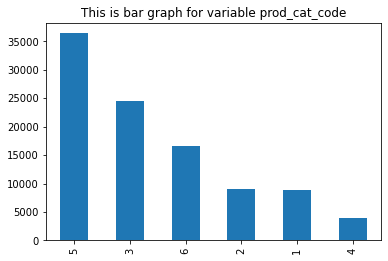

AxesSubplot(0.125,0.125;0.775x0.755)


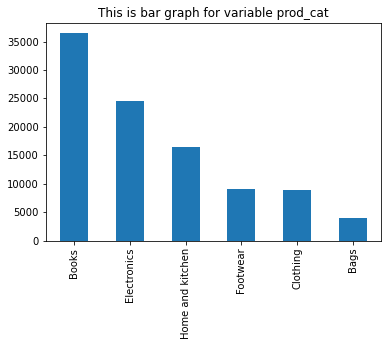

AxesSubplot(0.125,0.125;0.775x0.755)


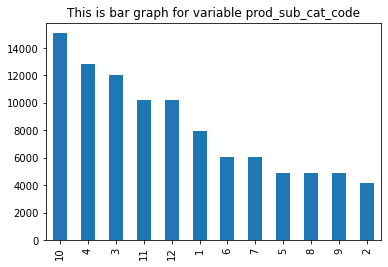

AxesSubplot(0.125,0.125;0.775x0.755)


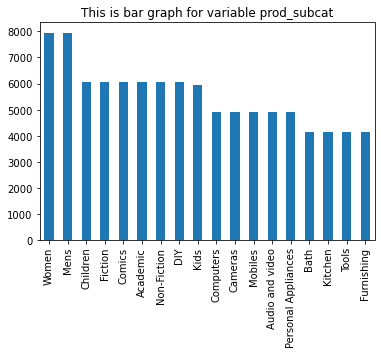

AxesSubplot(0.125,0.125;0.775x0.755)


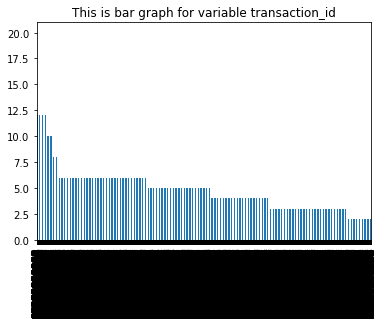

AxesSubplot(0.125,0.125;0.775x0.755)


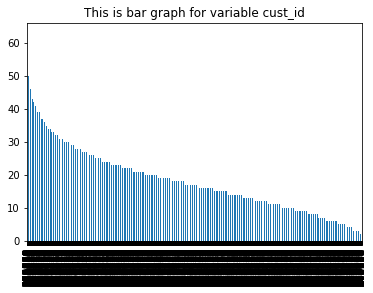

AxesSubplot(0.125,0.125;0.775x0.755)


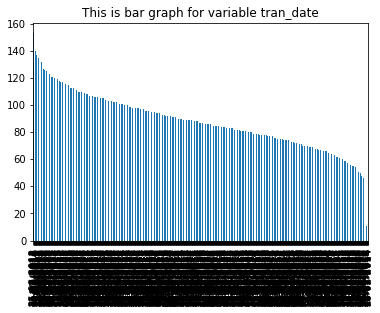

AxesSubplot(0.125,0.125;0.775x0.755)


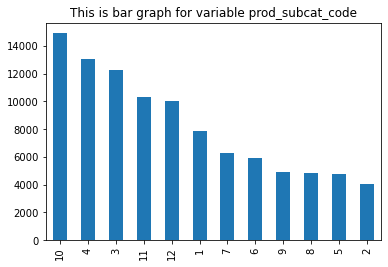

AxesSubplot(0.125,0.125;0.775x0.755)


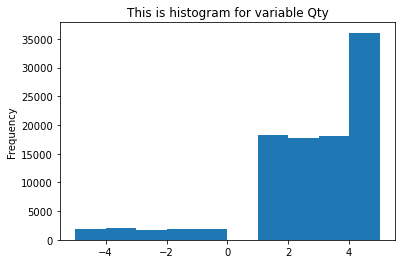

AxesSubplot(0.125,0.125;0.775x0.755)


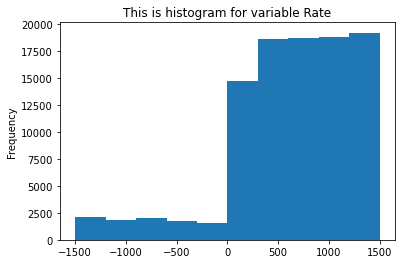

AxesSubplot(0.125,0.125;0.775x0.755)


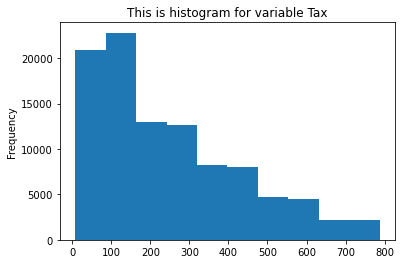

AxesSubplot(0.125,0.125;0.775x0.755)


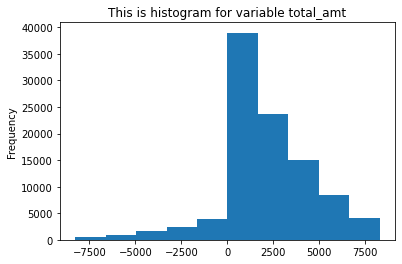

AxesSubplot(0.125,0.125;0.775x0.755)


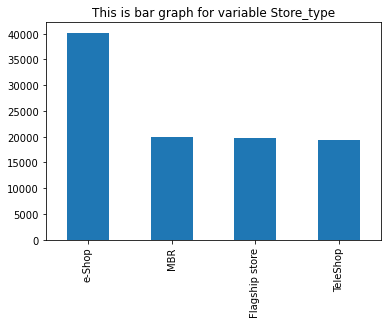

AxesSubplot(0.125,0.125;0.775x0.755)


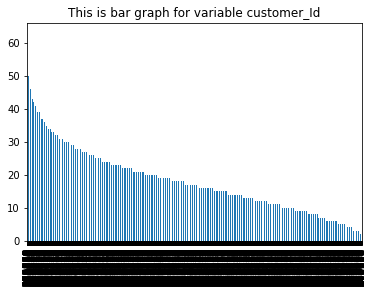

AxesSubplot(0.125,0.125;0.775x0.755)


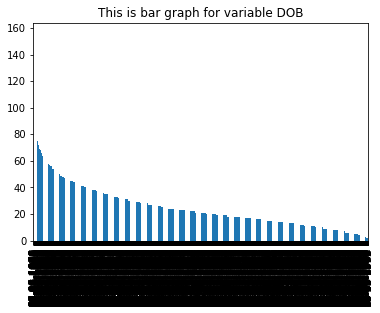

AxesSubplot(0.125,0.125;0.775x0.755)


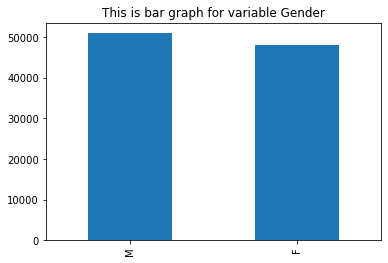

AxesSubplot(0.125,0.125;0.775x0.755)


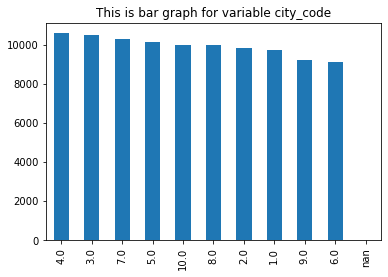

In [116]:
for i in cust_prod_trans.columns:
    if cust_prod_trans[i].dtype in ['float64', 'int64']:
        plt.title('This is histogram for variable ' + i)
        print(cust_prod_trans[i].plot(kind= 'hist'))
        plt.show()
    else:
        plt.title('This is bar graph for variable '+ i )
        print(cust_prod_trans[i].value_counts().plot(kind= 'bar'))
        plt.show()
    

#### 4. Calculate the following information using the merged dataset :
##### a. Time period of the available transaction data

In [117]:
cust_prod_trans.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat',
       'transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'customer_Id', 'DOB',
       'Gender', 'city_code'],
      dtype='object')

In [121]:
cust_prod_trans.tran_date= pd.to_datetime(cust_prod_trans.tran_date)
cust_prod_trans.DOB= pd.to_datetime(cust_prod_trans.DOB)

In [123]:
max(cust_prod_trans.tran_date) - min(cust_prod_trans.tran_date)

Timedelta('1430 days 00:00:00')

 ##### b. Count of transactions where the total amount of transaction was negative]
    

In [127]:
cust_prod_trans.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1,Clothing,4,Mens,80712190438,270351,2014-02-28,1,-5,-772,405.3,-4265.3,e-Shop,270351,1981-09-26,M,5.0
1,1,Clothing,4,Mens,80712190438,270351,2014-02-20,1,5,772,405.3,4265.3,e-Shop,270351,1981-09-26,M,5.0


In [126]:
cust_prod_trans.loc[ cust_prod_trans.total_amt <0, 'prod_cat_code'].count()

9294

#### 5. Analyze which product categories are more popular among females vs male customers.

In [132]:
# For males
cust_prod_trans.loc[cust_prod_trans.Gender== 'M', 'prod_cat'].value_counts().head(1)

Books    18696
Name: prod_cat, dtype: int64

In [133]:
# For females
cust_prod_trans.loc[cust_prod_trans.Gender== 'F', 'prod_cat'].value_counts().head(1)

Books    17694
Name: prod_cat, dtype: int64

#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [139]:
per_city= (cust_prod_trans.city_code.value_counts() * 100)/ cust_prod_trans.city_code.count()

In [157]:
per_city= per_city.reset_index().rename(columns={'index': 'City_code', 'city_code': 'percent'})

In [159]:
per_city.City_code.head(1)

0    4.0
Name: City_code, dtype: object

#### 7. Which store type sells the maximum products by value and by quantity?

In [176]:
cust_prod_trans.pivot_table( values= ['Qty', 'total_amt'], index= 'Store_type', aggfunc= 'sum').reset_index().sort_values(by= 'Qty', ascending= False).Store_type.head(1)

3    e-Shop
Name: Store_type, dtype: object

#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [196]:
cust_prod_trans.loc[(cust_prod_trans.prod_cat == "Electronics") | (cust_prod_trans.prod_cat == "Clothing") & (cust_prod_trans.Store_type == 'Flagship store'), 'total_amt'].sum()

57195587.86500001

#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [198]:
cust_prod_trans.loc[(cust_prod_trans.prod_cat == "Electronics") & (cust_prod_trans.Gender == 'M'), 'total_amt'].sum()

28515547.124999996

#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [204]:
cust_prod_trans.loc[cust_prod_trans.total_amt >=0, ['cust_id', 'transaction_id', 'prod_cat_code']].pivot_table(index= ['cust_id', 'transaction_id'], aggfunc= 'count')

prod_cat_code
cust_id transaction_id               
266783  16999552161                 6
        25890929042                 3
        8410316370                  3
        98477711300                 3
266784  26928161256                 6
...                               ...
275264  81382444243                 4
        94712826085                 6
275265  24113900219                 4
        38961184788                 6
        7214136016                  2

[20876 rows x 1 columns]

In [214]:
q10= cust_prod_trans.loc[cust_prod_trans.total_amt >=0, ['cust_id', 'transaction_id']].pivot_table(index= ['cust_id'], aggfunc= 'nunique').reset_index().rename(columns= {'transaction_id': 'cnt_unique_trans_id'})

In [215]:
q10.head(1)

,cust_id,cnt_unique_trans_id
0,266783,4


In [219]:
q10.loc[q10.cnt_unique_trans_id >= 10, 'cust_id'].count()

27

#### 11. For all customers aged between 25 - 35, find out:

In [232]:
cust_prod_trans['Age']= date.today().year - cust_prod_trans.DOB.dt.year

In [242]:
cust_25_35= cust_prod_trans.loc[(cust_prod_trans.Age >= 25) & (cust_prod_trans.Age <= 35), :]

 ##### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [243]:
cust_25_35.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,Age
210,1,Clothing,4,Mens,57134739558,270625,2014-02-14,1,5,595,312.375,3287.375,TeleShop,270625,1992-03-02,M,6.0,31
211,1,Clothing,4,Mens,42584381402,270625,2012-06-22,1,5,1371,719.775,7574.775,TeleShop,270625,1992-03-02,M,6.0,31


In [246]:
cust_25_35.loc[(cust_25_35.prod_cat == 'Books') | (cust_25_35.prod_cat == 'Electronics'), 'total_amt'].sum()


27367446.599999998

 ##### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [249]:
cust_25_35.loc[(cust_25_35.tran_date >= '2014-01-01') & (cust_25_35.tran_date <= '2014-03-01'), 'total_amt'].sum()

1588406.56